<a href="https://colab.research.google.com/github/lilipolinema/PCVK_Genap_2021/blob/master/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Lili Nur Indah Sari**

**Kelas: TI-3F**

**NIM: 1841720037**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar animal.jpg dan animal-template.jpg sebagai templatenya. 

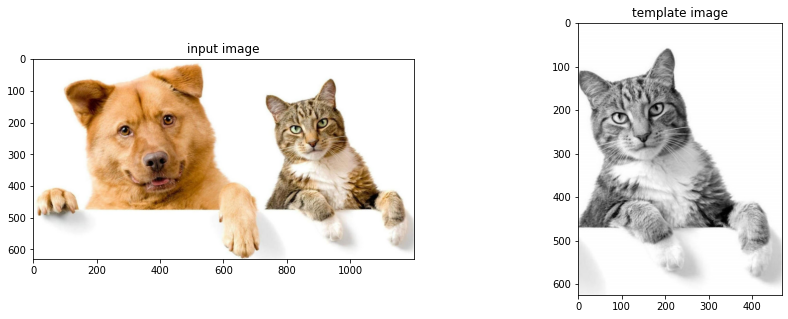

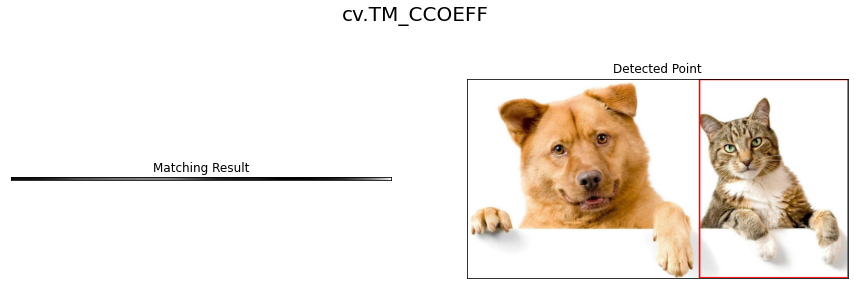

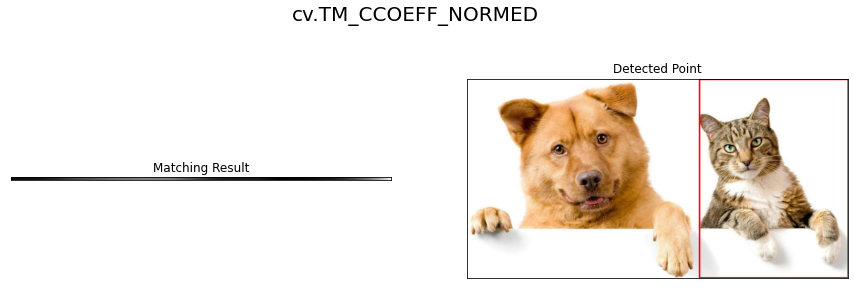

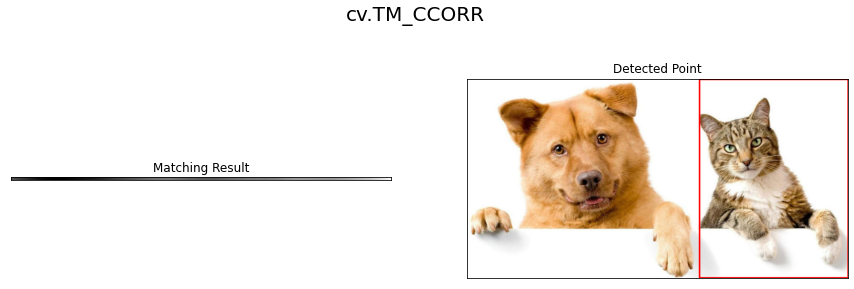

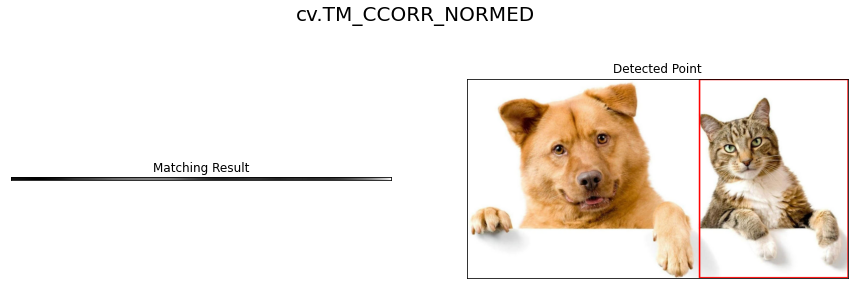

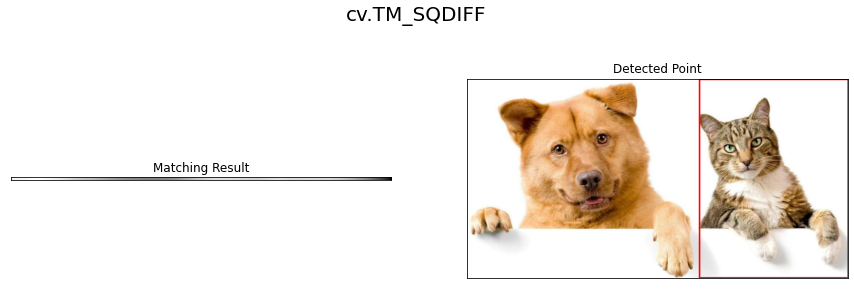

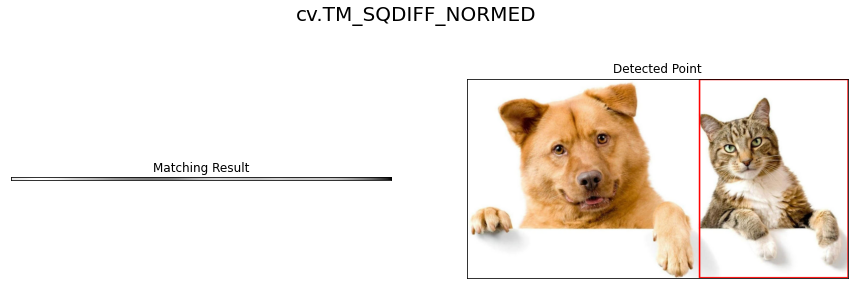

In [3]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/cats_and_dog.jpg')
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image2 = image.copy()
template = cv.imread('/content/drive/MyDrive/PCVK/Images/cats_template.jpg',0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
            
for meth in methods:
    image = image2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(image_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(image,top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut: 

a. Sobel Edge Detection

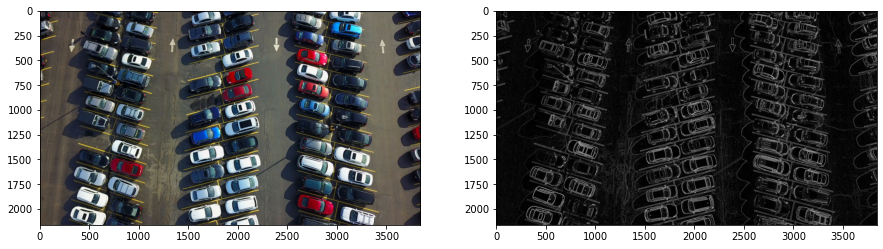

In [9]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/Images/parking-lot-cars.jpg')
# converting to gray scale
gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# remove noise
img = cv.GaussianBlur(gray,(3,3),0)

# obtaining a horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.show()

b. Canny Edge Detection 

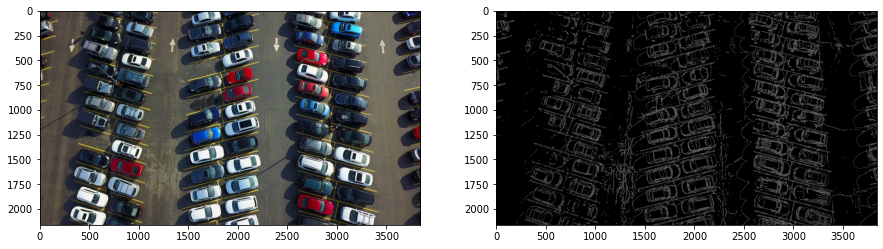

In [8]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/Images/parking-lot-cars.jpg')

edges = cv.Canny(img3,100,200)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.show()

c. Laplacian Edge Detection 

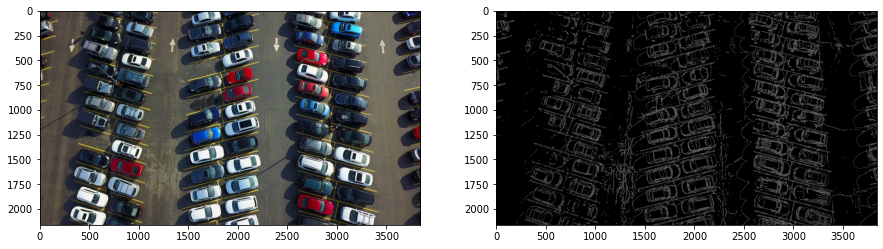

In [7]:
image_original = cv.imread('/content/drive/MyDrive/PCVK/Images/parking-lot-cars.jpg', cv.IMREAD_COLOR)
# remove noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# Reduce noise in image
img = cv.GaussianBlur(image_gray,(3,3),0)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)

# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))
plt.show()

4. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

a. Harris Corner Detection 

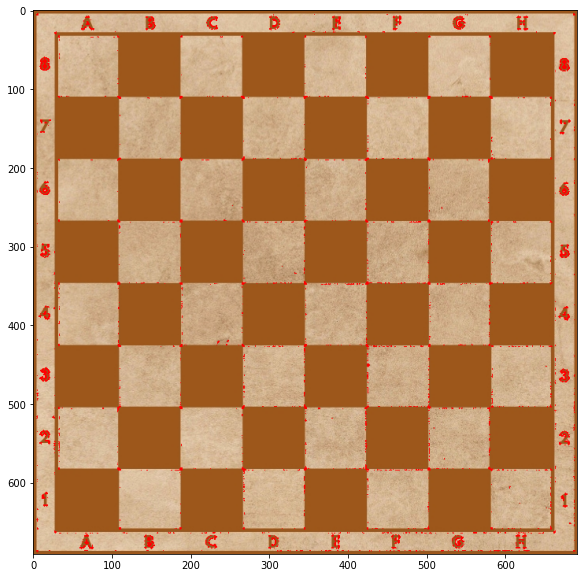

In [10]:
input_image = cv.imread('/content/drive/MyDrive/PCVK/Images/chess-board.jpg')
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_image,2,3,0.001)

gray_image = np.float32(gray_image) 
harris_output = cv.cornerHarris(gray_image,2,3,0.04)

#the result of harris corner is dilated to mark the corner
harris_output = cv.dilate(harris_output, None)

#Threshold to optimize value
input_image[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))

b. Shi-Tomasi Detection

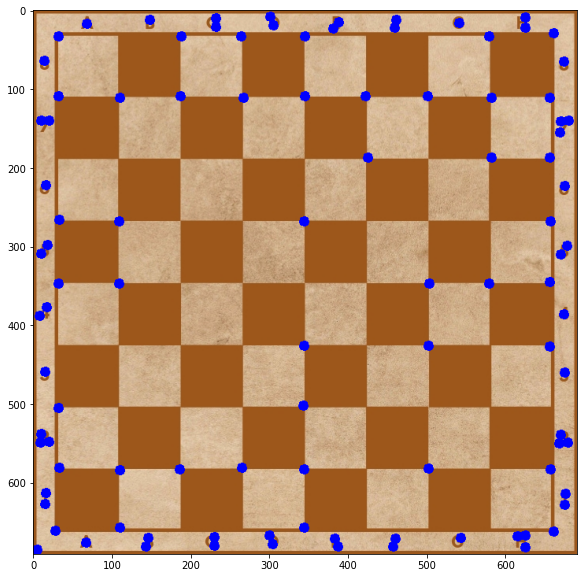

In [11]:
input_image = cv.imread('/content/drive/MyDrive/PCVK/Images/chess-board.jpg')
gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

corner = cv.goodFeaturesToTrack(gray_image,100, 0.01,10)
corner = np.int0(corner)
for i in corner:
    x,y = i.ravel()
    cv.circle(input_image,(x,y),3,255,5)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))

5. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut: 

6. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:


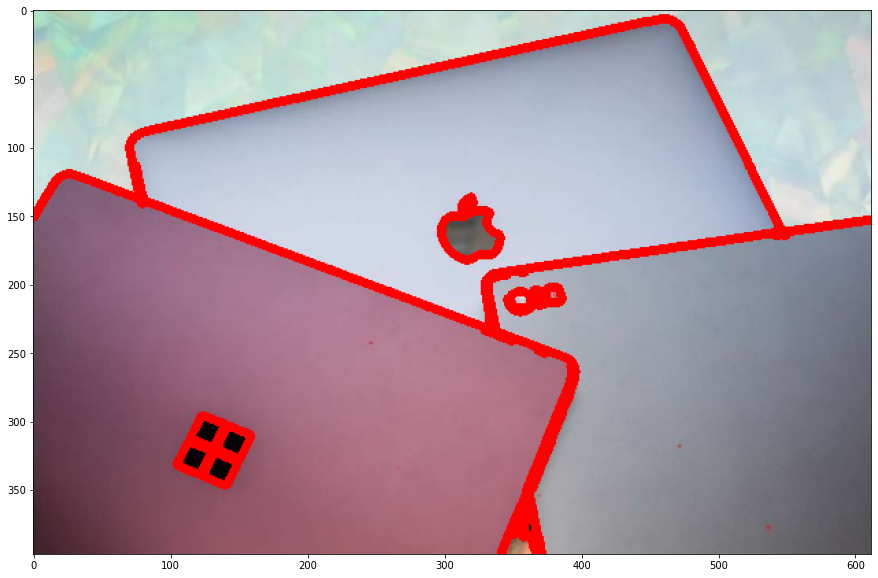

In [12]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 5)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))